<a href="https://colab.research.google.com/github/ayush-sharma2601/ML_Term_Project_Grp_1_MultiKOC/blob/main/MultiKOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MultiKOC**

Group 1 : Ayush Sharma (2019AAPS0484G), Rachit Jain (2019A7PS0140G)


Honor Code:  I shall be honest in my efforts and will make my parents proud. 

The motivation for using MultiKOC (Multi-one-class classifier based on K-means) is that multiple subclusters can occur in the class cluster of one-class classification problems which classic one-class classifiers fail to handle as they do not see the negative samples or sub-data, especially in computational biology such as multiple tumors, protein folds, biometrics, MRI, etc. The MultiKOC handles this issue by clustering the positive samples using K means and then training a one-class classifier for each cluster.

## Imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Datasets

## Iris Dataset

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length and width, stored in a 150x4 numpy.ndarray

In [ ]:
iris = datasets.load_iris()

In [ ]:
# class 1 - versicolor
# class 2 - virginica
# class 3 - setosa

In [ ]:
# concatinating the required data from the iris dataset
iris_data = np.c_[iris['data'], iris['target']]
# column names
column_names = iris['feature_names'] + ['target']
# data in DataFrame
iris_data = pd.DataFrame(data= iris_data,columns= column_names)

In [ ]:
iris_data['target'] = iris_data[['target']].astype(int)

In [ ]:
iris_data['target'] = iris_data['target'].replace(to_replace = 0, value =3)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,3
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
print(iris_data['target'].value_counts())

3    50
1    50
2    50
Name: target, dtype: int64


Text(0.5, 0.98, 'Iris (petal length and sepal length)')

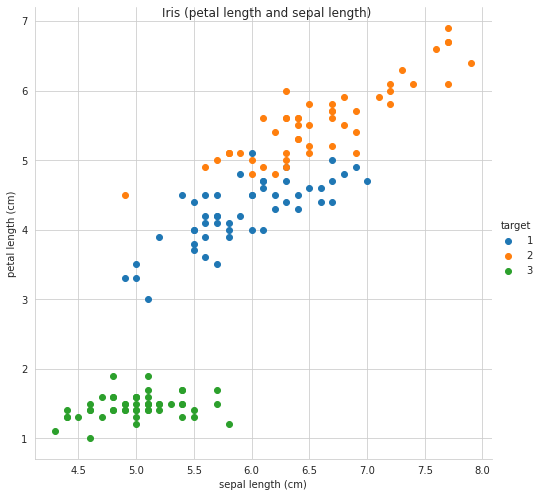

In [ ]:
sns.set_style("whitegrid")
m = sns.FacetGrid(iris_data, hue ="target",
              height = 7).map(plt.scatter,
                              'sepal length (cm)',
                              'petal length (cm)').add_legend()
m.fig.suptitle('Iris (petal length and sepal length)')

#### Binary Datasets from Iris

In [ ]:
# making different datasets with positive class as 1 and negative class as 0

# class 1 positive
class_1_iris = iris_data.copy()
class_1_iris['target'] = class_1_iris['target'].replace([2,3], 0)

In [ ]:
print(class_1_iris['target'].value_counts())

0    100
1     50
Name: target, dtype: int64


Text(0.5, 0.98, 'Iris (class 1 - positive)')

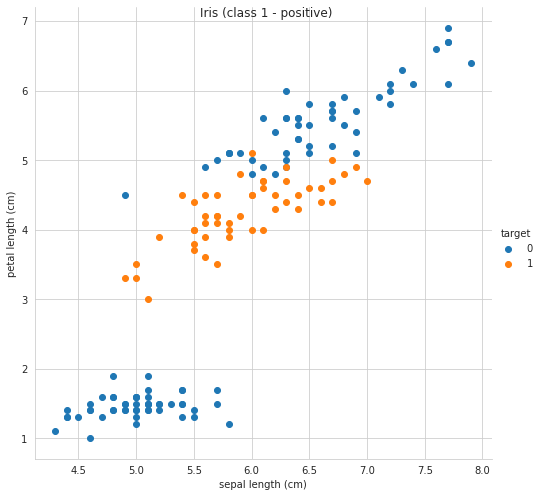

In [ ]:
sns.set_style("whitegrid")
m = sns.FacetGrid(class_1_iris, hue ="target",
              height = 7).map(plt.scatter,
                              'sepal length (cm)',
                              'petal length (cm)').add_legend()
m.fig.suptitle('Iris (class 1 - positive)')

In [ ]:
# class 1 and 2 positive

class_1_2_iris = iris_data.copy()
class_1_2_iris['target'] = class_1_2_iris['target'].replace([[1, 2],3], [1,0])

In [ ]:
print(class_1_2_iris['target'].value_counts())

1    100
0     50
Name: target, dtype: int64


Text(0.5, 0.98, 'Iris (class 1,2 positive)')

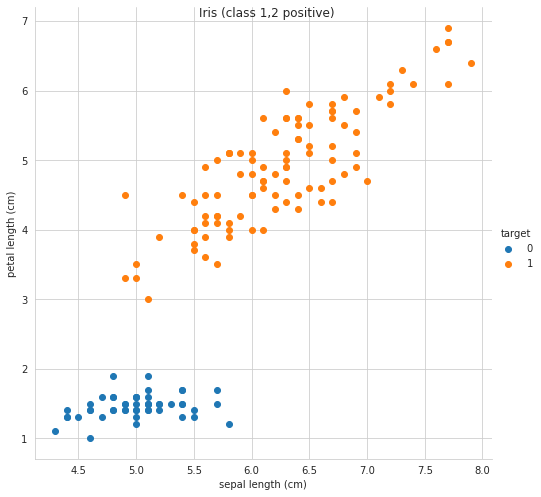

In [ ]:
sns.set_style("whitegrid")
m = sns.FacetGrid(class_1_2_iris, hue ="target",
              height = 7).map(plt.scatter,
                              'sepal length (cm)',
                              'petal length (cm)').add_legend()
m.fig.suptitle('Iris (class 1,2 positive)')

In [ ]:
# class 1 and 3 positive

class_1_3_iris = iris_data.copy()
class_1_3_iris['target'] = class_1_3_iris['target'].replace([[1, 3],2], [1,0])

In [ ]:
print(class_1_3_iris['target'].value_counts())

1    100
0     50
Name: target, dtype: int64


Text(0.5, 0.98, 'Iris (class 1,3 positive)')

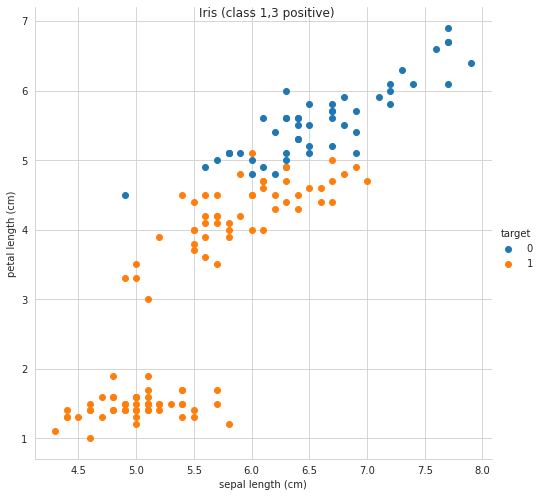

In [ ]:
sns.set_style("whitegrid")
m = sns.FacetGrid(class_1_3_iris, hue ="target",
              height = 7).map(plt.scatter,
                              'sepal length (cm)',
                              'petal length (cm)').add_legend()
m.fig.suptitle('Iris (class 1,3 positive)')

In [ ]:
# class 2 and 3 positive

class_2_3_iris = iris_data.copy()
class_2_3_iris['target'] = class_2_3_iris['target'].replace([[2, 3],1], [1,0])

In [ ]:
print(class_2_3_iris['target'].value_counts())

1    100
0     50
Name: target, dtype: int64


Text(0.5, 0.98, 'Iris (class 2,3 positive)')

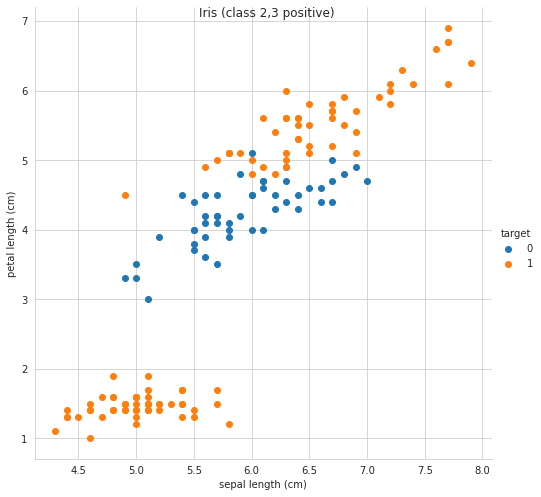

In [ ]:
sns.set_style("whitegrid")
m = sns.FacetGrid(class_2_3_iris, hue ="target",
              height = 7).map(plt.scatter,
                              'sepal length (cm)',
                              'petal length (cm)').add_legend()
m.fig.suptitle('Iris (class 2,3 positive)')

## New Thyroid Dataset

Five lab. tests are used to try to predict whether a patient's
	thyroid to the class euthyroidism, hypothyroidism or
	hyperthyroidism. The diagnosis (the class label) was based
	on a complete medical record, including anamnesis, scan etc.

In [ ]:
# New Thyroid
# label - Class attribute (1 = normal, 2 = hyper, 3 = hypo)
# T-3 resin - T3-resin uptake test. (A percentage)
# thyroxin - Total Serum thyroxin as measured by the isotopic displacement method.
# triiodothyronin - Total serum triiodothyronine as measured by radioimmuno assay.
# TSH - basal thyroid-stimulating hormone (TSH) as measured by radioimmuno assay.
# TSH diff - Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin-releasing hormone as compared to the basal value.

columns = ["T3-resin","Thyroxin","Triiodothyronine","TSH","TSH diff","target"]
thyroid_raw_csv = pd.read_csv("https://raw.githubusercontent.com/ayush-sharma2601/Datasets/main/new_thyroid.csv",names=columns)

In [ ]:
new_thyroid_df = pd.DataFrame(thyroid_raw_csv)
new_thyroid_df

,T3-resin,Thyroxin,Triiodothyronine,TSH,TSH diff,target
0,107,10.1,2.2,0.9,2.7,1
1,113,9.9,3.1,2.0,5.9,1
2,127,12.9,2.4,1.4,0.6,1
3,109,5.3,1.6,1.4,1.5,1
4,105,7.3,1.5,1.5,-0.1,1
...,...,...,...,...,...,...
210,118,6.5,1.3,1.7,11.5,3
211,139,4.2,0.7,4.3,6.3,3
212,103,5.1,1.4,1.2,5.0,3
213,97,4.7,1.1,2.1,12.6,3


In [ ]:
print(new_thyroid_df['target'].value_counts())

1    150
2     35
3     30
Name: target, dtype: int64


Text(0.5, 0.98, 'New Thyroid (T3-resin and Thyroxin)')

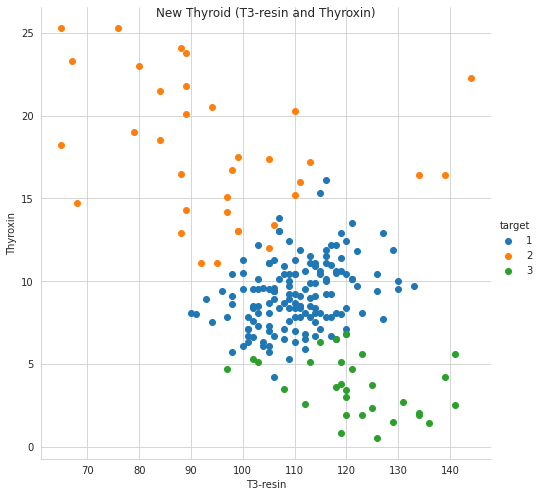

In [ ]:
sns.set_style("whitegrid")
m = sns.FacetGrid(new_thyroid_df, hue ="target",
              height = 7).map(plt.scatter,
                              'T3-resin',
                              'Thyroxin').add_legend()
m.fig.suptitle('New Thyroid (T3-resin and Thyroxin)')

#### Binary Datasets from New Thyroid

In [ ]:
# making different datasets with positive class as 1 and negative class as 0

# class 1 positive
class_1_thyroid = new_thyroid_df.copy()
class_1_thyroid['target'] = class_1_thyroid['target'].replace([2, 3], 0)

In [ ]:
# 150 positive, 30+35 negative
print(class_1_thyroid['target'].value_counts())


1    150
0     65
Name: target, dtype: int64


Text(0.5, 0.98, 'New Thyroid (class 1 positive)')

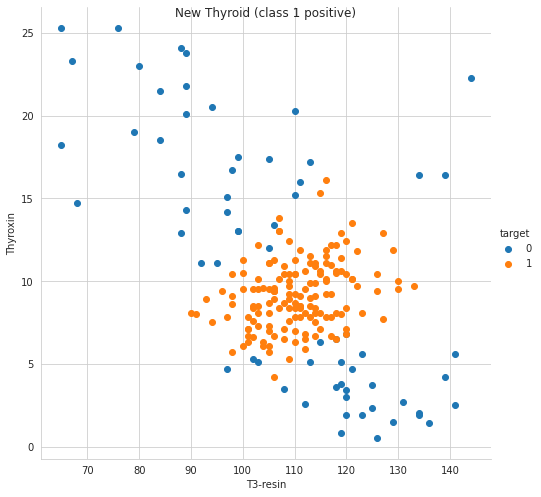

In [ ]:
sns.set_style("whitegrid")
m = sns.FacetGrid(class_1_thyroid, hue ="target",
              height = 7).map(plt.scatter,
                              'T3-resin',
                              'Thyroxin').add_legend()
m.fig.suptitle('New Thyroid (class 1 positive)')

In [ ]:
# class 1 and 2 positive

class_1_2_thyroid = new_thyroid_df.copy()
class_1_2_thyroid['target'] = class_1_2_thyroid['target'].replace([[1, 2],3], [1,0])

In [ ]:
# 150+35 positive, 30 negative
print(class_1_2_thyroid['target'].value_counts())

1    185
0     30
Name: target, dtype: int64


Text(0.5, 0.98, 'New Thyroid (class 1,2 positive)')

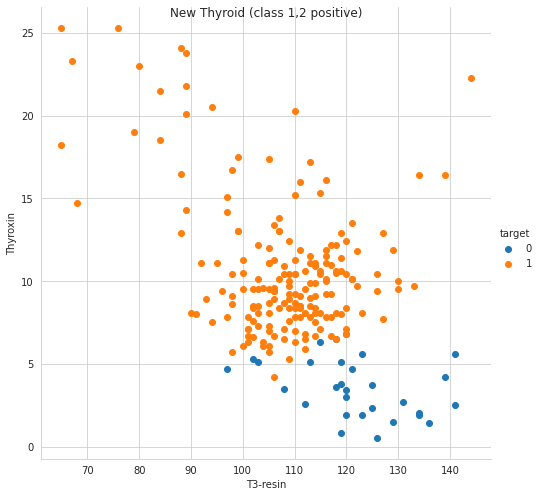

In [ ]:
sns.set_style("whitegrid")
m = sns.FacetGrid(class_1_2_thyroid, hue ="target",
              height = 7).map(plt.scatter,
                              'T3-resin',
                              'Thyroxin').add_legend()
m.fig.suptitle('New Thyroid (class 1,2 positive)')

In [ ]:
# class 1 and 3 positive

class_1_3_thyroid = new_thyroid_df.copy()
class_1_3_thyroid['target'] = class_1_3_thyroid['target'].replace([[1, 3],2], [1,0])

In [ ]:
# 150+30 positive, 35 negative
print(class_1_3_thyroid['target'].value_counts())

1    180
0     35
Name: target, dtype: int64


Text(0.5, 0.98, 'New Thyroid (class 1,3 positive)')

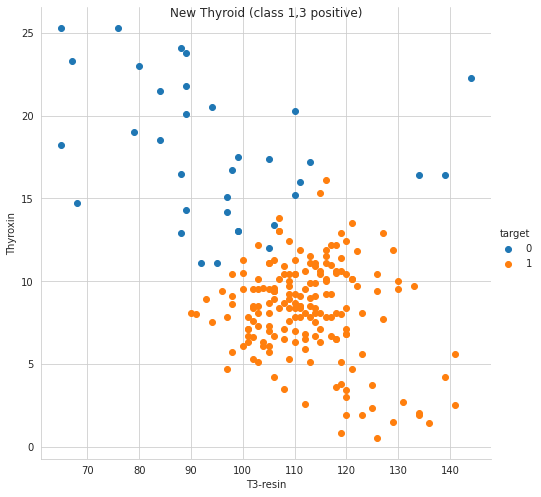

In [ ]:
sns.set_style("whitegrid")
m = sns.FacetGrid(class_1_3_thyroid, hue ="target",
              height = 7).map(plt.scatter,
                              'T3-resin',
                              'Thyroxin').add_legend()
m.fig.suptitle('New Thyroid (class 1,3 positive)')

In [ ]:
# class 2 and 3 positive

class_2_3_thyroid = new_thyroid_df.copy()
class_2_3_thyroid['target'] = class_2_3_thyroid['target'].replace([[2, 3],1], [1,0])

In [ ]:
# 35+30 positive, 150 negative
print(class_2_3_thyroid['target'].value_counts())

0    150
1     65
Name: target, dtype: int64


Text(0.5, 0.98, 'New Thyroid (class 2,3 positive)')

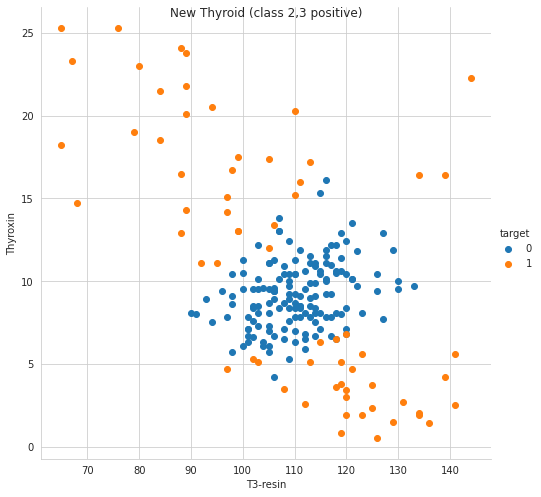

In [ ]:
sns.set_style("whitegrid")
m = sns.FacetGrid(class_2_3_thyroid, hue ="target",
              height = 7).map(plt.scatter,
                              'T3-resin',
                              'Thyroxin').add_legend()
m.fig.suptitle('New Thyroid (class 2,3 positive)')

## Breast cancer wisconsin (diagnostic) dataset

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

In [ ]:
# class 0 - Malignant
# class 1 - Benign
cancer = datasets.load_breast_cancer()

In [ ]:
target = np.reshape(cancer.target,(len(cancer.target),1))
# data in DataFrame
cancer_df = pd.DataFrame(data= np.hstack((cancer.data,target)),columns= np.hstack((cancer.feature_names,['target'])))
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [ ]:
print(cancer_df['target'].value_counts())

1.0    357
0.0    212
Name: target, dtype: int64


Text(0.5, 0.98, 'Breast Cancer (mean radius and mean smoothness)')

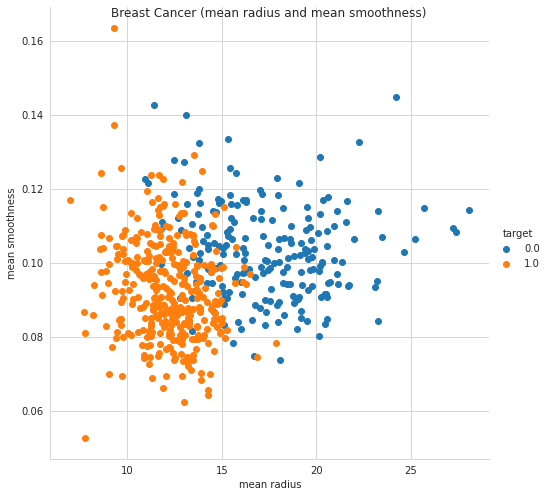

In [ ]:
sns.set_style("whitegrid")
m = sns.FacetGrid(cancer_df, hue ="target",
              height = 7).map(plt.scatter,
                              'mean radius',
                              'mean smoothness').add_legend()
m.fig.suptitle('Breast Cancer (mean radius and mean smoothness)')

# MultiKOC Algorithm

The MultiKOC uses a simple methodology. It first takes into account only the positive samples, disregarding the negative samples. Then it uses K-means clustering (other clustering algorithms can be used according to the dataset) to divide the positive samples into clusters. The number of clusters is not critical, as identifying 2 different clusters as 1 is more problematic than dividing one cluster into 2 clusters. After clustering, one-class classifiers (J48, Random Forest, Naive Bayes, SVM, etc.) are trained on each cluster.
Now, for a test instance, all the one-class classifiers are used, and if at least one of them identifies it as positive, then it is considered as positive, else negative.

In [ ]:
# Function to predict outliers and inliers, given data and list of classifiers trained on clusters

def mkoc_predict(data,one_class_classifiers):
    # initially y_pred is 0 for all inputs
    y_pred = [0 for x in range(len(data))]

    for one_class in one_class_classifiers:

        # get predicted values for classifier
        predicted_value = one_class.predict(data)

        # for Naive Bayes and J48, outliers are predicted as 0, so replace them with -1
        for i in range(0,len(predicted_value)):
            if(predicted_value[i] == 0):
                predicted_value[i] = -1

        # get sum over all classifiers
        y_pred += predicted_value

    for i in range(0,len(y_pred)):
        # for all inputs, if all classifiers predict as -1, then input in outlier to all clusters, hence predicted as 0 - outlier, else 1 - inlier
        if(y_pred[i] == 0-len(one_class_classifiers)):
            y_pred[i] = 0
        else:
            y_pred[i] = 1
    return y_pred

# Function to fit classifiers on given data

def mkoc(data,labels,k,classifier_type,plot_feature_1, plot_feature_2, plot_title):
    # fit k clusters over the data
    km = KMeans(
    n_clusters=k, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
    )
    y_km = km.fit_predict(data)

    # fit and append classfiers for all clusters according to the classfier_type
    one_class_classifiers = []
    for i in range(0,k):
        x = data[y_km == i]
        y = labels[y_km == i]
        if(classifier_type == 'SVM'):
          clf = OneClassSVM( kernel = 'rbf').fit(x)
          one_class_classifiers.append(clf)
        elif(classifier_type == 'RF'):
          clf = IsolationForest(contamination=0.01).fit(x)
          one_class_classifiers.append(clf)
        elif(classifier_type == 'J48'):
          clf = tree.DecisionTreeClassifier()
          clf.fit(x,y)
          one_class_classifiers.append(clf)
        elif(classifier_type == 'NB'):
          clf = GaussianNB()
          clf.fit(x, y)
          one_class_classifiers.append(clf)
        else:
            print(classifier_type)
            print("Classifier type not supported")
    return one_class_classifiers

In [ ]:
# Function to plot clusters, given data, cluster centroids, cluster labels, and axis labels

def plot_graph(X,y_km,km,x_axis_title,y_axis_title,plot_title):
    plt.figure(figsize = (10,8))
    plt.grid(True)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel(x_axis_title,fontsize=25)
    plt.ylabel(y_axis_title,fontsize=25)
    plt.title(plot_title,fontsize=30)

    # plot the clusters
    colors=['lightgreen','blue','pink','cyan','black']
    unique_clusters = Counter(y_km).keys()
    for i in range(0,len(unique_clusters)):
      plt.scatter(
          X[y_km == i, 0], X[y_km == i, 1],
          s=50, c=colors[i],
          marker='s', edgecolor='black',
          label='cluster '+str(i)
      )


    # plot the centroids
    plt.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.legend(scatterpoints=1,loc='best')
    plt.show()

In [ ]:
# Function to clean dataset of Nan, inf, and -inf values

def clean_dataset(df):
  # assert dataframe
  assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
  # replace inf and -inf with nan
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
  # drop nan containing rows
  df.dropna(inplace=True)
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
  # return non nan containing rows
  return df[indices_to_keep].astype(np.float32)

In [ ]:
def MultiKOC(data_frame_1, positive_class, negative_class, classifier_list, k_clusters, plot_feature_1, plot_feature_2, plot_title, neg_present = False):

  data_frame = clean_dataset(data_frame_1)

  # one class datasets from binary dataset
  data_pos = data_frame[data_frame['target'] == positive_class]
  data_neg = data_frame[data_frame['target'] == negative_class]

  # separating target and features of pos and neg class data
  x_data = data_pos.drop(['target'],axis=1).values
  y_data = data_pos['target'].values

  x_data_neg = data_neg.drop(['target'],axis=1).values
  y_data_neg = data_neg['target'].values

  dash = '-' * 80

  from sklearn.model_selection import train_test_split

  print(dash)
  print('DataSet: ' + plot_title)
  print('Number of clusters: ' + str(k_clusters))
  print(dash)

  # Doing 80-20 train-test split (for cluster plotting purposes)
  x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=42)

  # fitting k_clusters using k means clustering (for cluster plotting purposes)
  km = KMeans(
    n_clusters=k_clusters, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
    )
  y_km = km.fit_predict(x_train)

  # plotting the clusters
  plot_graph(x_train,y_km,km, plot_feature_1, plot_feature_2, plot_title )


  # training, predicting, and printing metrics for all classifiers
  for classifier in classifier_list:

    print(dash)
    print('Classifier: ' + str(classifier))
    print(dash)

    # lists to store metrics over 100 experiments
    accuracy_list=[]
    precision_list=[]
    recall_list=[]
    macro_f1_list=[]

    # Using 100 different random states to get different training data for experiment
    for i in range(1,101):

      # train test split
      x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=i+24)

      # if neg_present is True, then we include instances of negative class data
      if neg_present :
        x_train = np.vstack((x_train,x_data_neg))
        y_train = np.concatenate((y_train,y_data_neg))

      # Scaling to remove negative values, and to standardise the data w.r.t training data
      scaler = StandardScaler()
      x_train = scaler.fit_transform(x_train)
      x_test = scaler.fit_transform(x_test)
      x_data_neg = scaler.fit_transform(x_data_neg)


      # getting the list of classifiers in t variable, fitted over each cluster
      t = mkoc(x_train,y_train,k_clusters,str(classifier),plot_feature_1, plot_feature_2, plot_title)

      # predicting using the k_cluster OC classifiers on test and negative class data
      y_pred = mkoc_predict(np.vstack((x_test,x_data_neg)),t)

      y_test_f = np.concatenate((y_test,y_data_neg))

      # Getting accuracy, precision, recall, and macro f1 score for prediction
      accuracy = accuracy_score(y_test_f,y_pred)
      precision =precision_score(y_test_f, y_pred,average='macro')
      recall =  recall_score(y_test_f, y_pred,average='macro')
      macro_f1 = f1_score(y_test_f,y_pred,average='macro')

      # appending metrics for all experiment iterations
      accuracy_list.append(accuracy)
      precision_list.append(precision)
      recall_list.append(recall)
      macro_f1_list.append(macro_f1)

    # getting average of metrics over 100 iterations
    average_accuracy = np.average(accuracy_list)
    average_precision = np.average(precision_list)
    average_recall = np.average(recall_list)
    average_macro_f1 = np.average(macro_f1_list)

    # printing average metrics
    print('Test accuracy(sklearn library): %.3f' %average_accuracy)
    print('Macro precision (sklearn library): %.3f' %average_precision)
    print('Macro recall (sklearn library): %.3f' %average_recall)
    print('Macro f1-score (sklearn library) : %.3f' %average_macro_f1)





# Results with only positive class trained

In [ ]:
classifiers = ['SVM', 'J48', 'RF', 'NB']

## Iris dataset results

--------------------------------------------------------------------------------
DataSet: Class_1_iris
Number of clusters: 3
--------------------------------------------------------------------------------


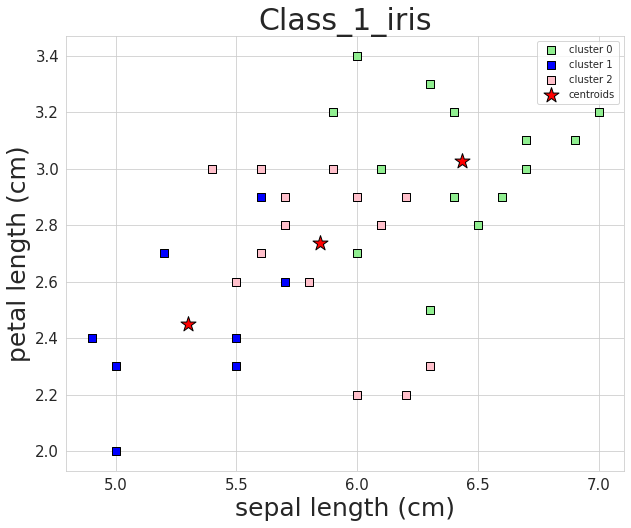

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.807
Macro precision (sklearn library): 0.556
Macro recall (sklearn library): 0.574
Macro f1-score (sklearn library) : 0.551
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.091
Macro precision (sklearn library): 0.045
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.083
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.103
Macro precision (sklearn library): 0.355
Macro recall (sklearn library): 0.503
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(class_1_iris,1,0,classifiers, 3, 'sepal length (cm)','petal length (cm)','Class_1_iris')

--------------------------------------------------------------------------------
DataSet: Class_1_2_iris
Number of clusters: 4
--------------------------------------------------------------------------------


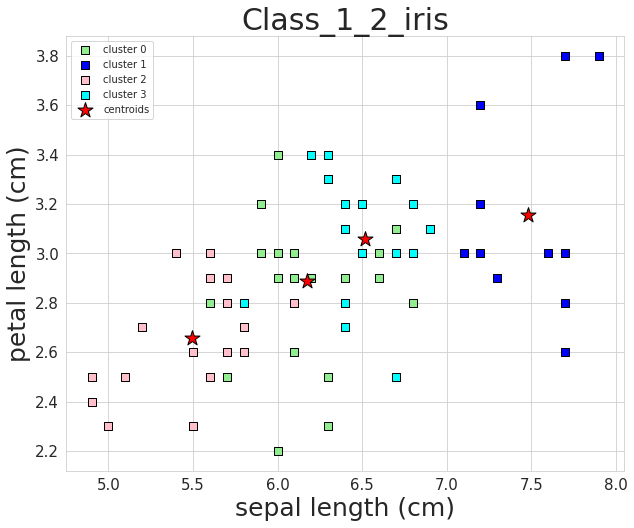

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.717
Macro precision (sklearn library): 0.640
Macro recall (sklearn library): 0.607
Macro f1-score (sklearn library) : 0.611
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.286
Macro precision (sklearn library): 0.143
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.222
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.291
Macro precision (sklearn library): 0.262
Macro recall (sklearn library): 0.502
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(class_1_2_iris,1,0,classifiers, 4, 'sepal length (cm)','petal length (cm)','Class_1_2_iris')

--------------------------------------------------------------------------------
DataSet: Class_2_3_iris
Number of clusters: 3
--------------------------------------------------------------------------------


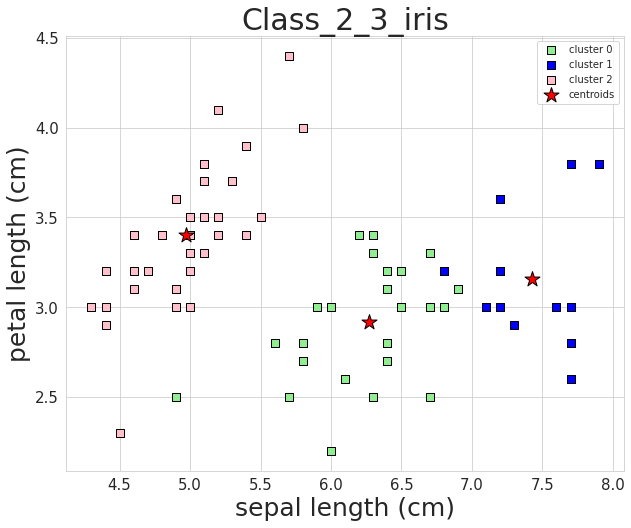

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.782
Macro precision (sklearn library): 0.763
Macro recall (sklearn library): 0.636
Macro f1-score (sklearn library) : 0.636
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.286
Macro precision (sklearn library): 0.143
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.222
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.367
Macro precision (sklearn library): 0.552
Macro recall (sklearn library): 0.543
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(class_2_3_iris,1,0,classifiers, 3, 'sepal length (cm)','petal length (cm)','Class_2_3_iris')

--------------------------------------------------------------------------------
DataSet: Class_1_3_iris
Number of clusters: 3
--------------------------------------------------------------------------------


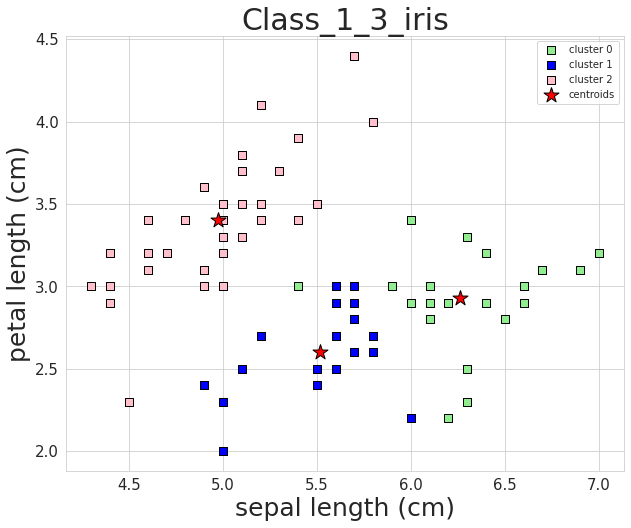

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.773
Macro precision (sklearn library): 0.731
Macro recall (sklearn library): 0.638
Macro f1-score (sklearn library) : 0.641
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.286
Macro precision (sklearn library): 0.143
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.222
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.355
Macro precision (sklearn library): 0.553
Macro recall (sklearn library): 0.539
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(class_1_3_iris,1,0,classifiers, 3, 'sepal length (cm)','petal length (cm)','Class_1_3_iris')

## New Thyroid Dataset results

--------------------------------------------------------------------------------
DataSet: Class_1_Thyroid
Number of clusters: 2
--------------------------------------------------------------------------------


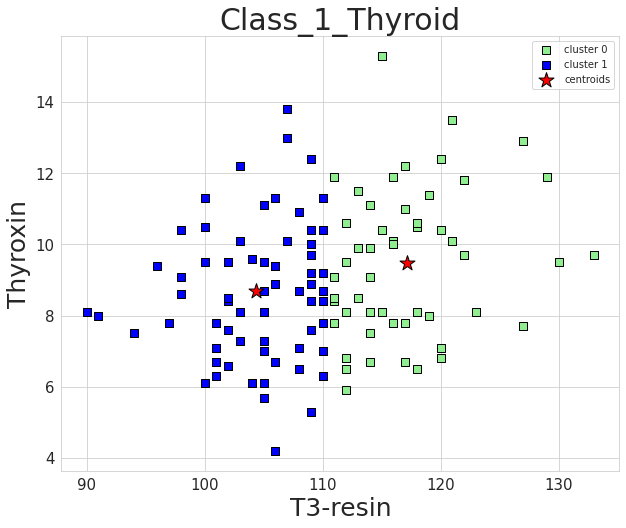

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.511
Macro precision (sklearn library): 0.490
Macro recall (sklearn library): 0.489
Macro f1-score (sklearn library) : 0.480
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.316
Macro precision (sklearn library): 0.158
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.240
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.319
Macro precision (sklearn library): 0.327
Macro recall (sklearn library): 0.501
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(class_1_thyroid,1,0,classifiers, 2, 'T3-resin','Thyroxin','Class_1_Thyroid')

--------------------------------------------------------------------------------
DataSet: Class_1_2_Thyroid
Number of clusters: 2
--------------------------------------------------------------------------------


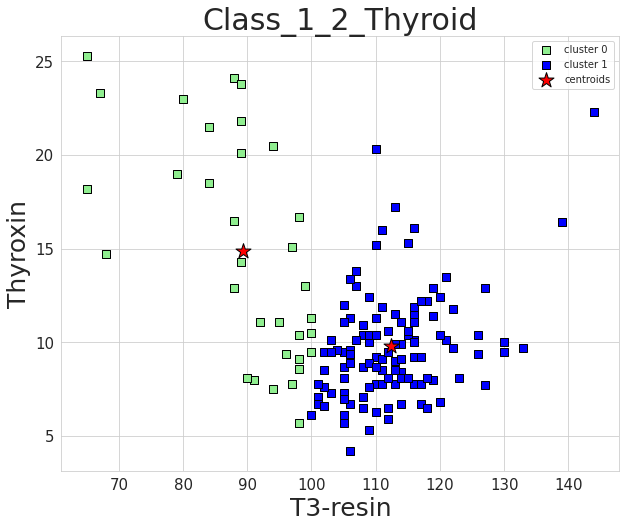

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.590
Macro precision (sklearn library): 0.619
Macro recall (sklearn library): 0.609
Macro f1-score (sklearn library) : 0.583
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.552
Macro precision (sklearn library): 0.276
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.356
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.552
Macro precision (sklearn library): 0.325
Macro recall (sklearn library): 0.501
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(class_1_2_thyroid,1,0,classifiers, 2, 'T3-resin','Thyroxin','Class_1_2_Thyroid')

--------------------------------------------------------------------------------
DataSet: Class_2_3_Thyroid
Number of clusters: 5
--------------------------------------------------------------------------------


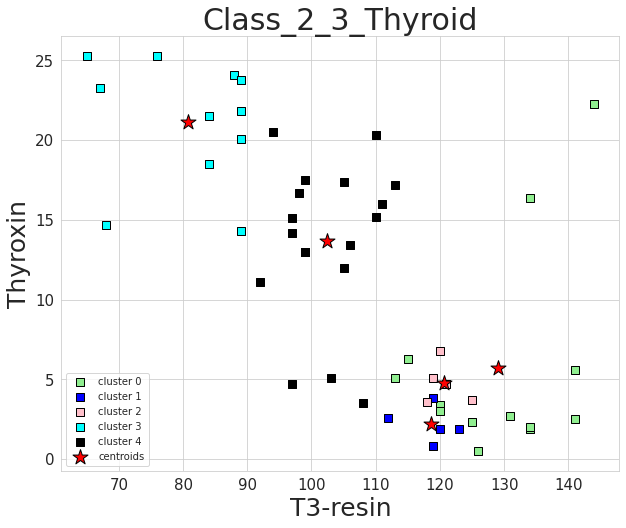

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.906
Macro precision (sklearn library): 0.658
Macro recall (sklearn library): 0.639
Macro f1-score (sklearn library) : 0.644
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.080
Macro precision (sklearn library): 0.040
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.074
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.110
Macro precision (sklearn library): 0.296
Macro recall (sklearn library): 0.505
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(class_2_3_thyroid,1,0,classifiers, 5, 'T3-resin','Thyroxin','Class_2_3_Thyroid')

--------------------------------------------------------------------------------
DataSet: Class_1_3_Thyroid
Number of clusters: 2
--------------------------------------------------------------------------------


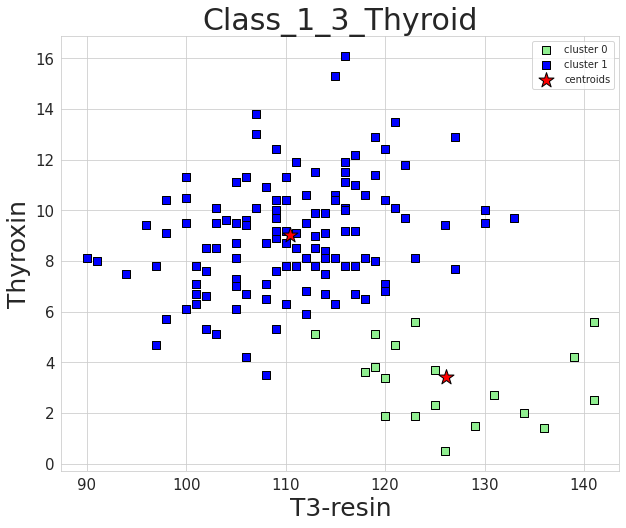

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.704
Macro precision (sklearn library): 0.783
Macro recall (sklearn library): 0.708
Macro f1-score (sklearn library) : 0.682
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.507
Macro precision (sklearn library): 0.254
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.336
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.571
Macro precision (sklearn library): 0.712
Macro recall (sklearn library): 0.565
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(class_1_3_thyroid,1,0,classifiers, 2, 'T3-resin','Thyroxin','Class_1_3_Thyroid')

## Wisconsin Breast Cancer Dataset results

--------------------------------------------------------------------------------
DataSet: Breast_cancer_Benign_positive
Number of clusters: 3
--------------------------------------------------------------------------------


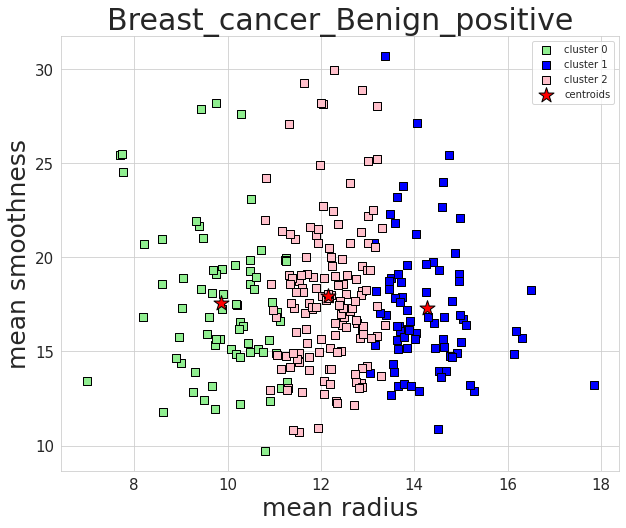

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.492
Macro precision (sklearn library): 0.487
Macro recall (sklearn library): 0.483
Macro f1-score (sklearn library) : 0.456
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.254
Macro precision (sklearn library): 0.127
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.202
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.256
Macro precision (sklearn library): 0.399
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(cancer_df,1,0,classifiers, 3, 'mean radius','mean smoothness','Breast_cancer_Benign_positive')

# Results with Positive and some of negative class trained

## Iris dataset results

--------------------------------------------------------------------------------
DataSet: Class_1_iris
Number of clusters: 3
--------------------------------------------------------------------------------


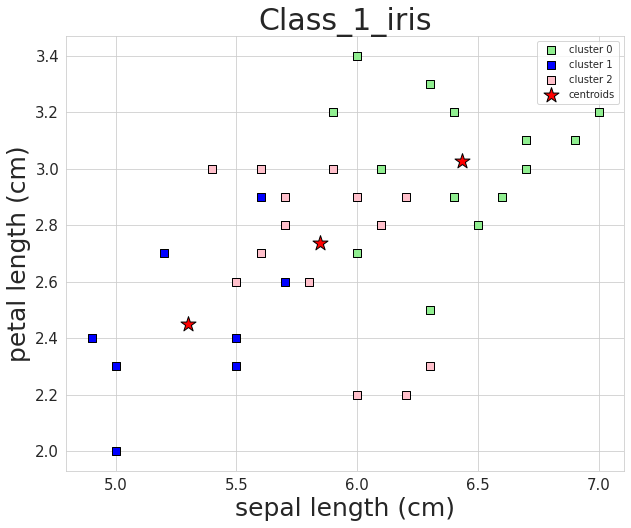

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.880
Macro precision (sklearn library): 0.460
Macro recall (sklearn library): 0.486
Macro f1-score (sklearn library) : 0.471
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.091
Macro precision (sklearn library): 0.045
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.083
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.378
Macro precision (sklearn library): 0.469
Macro recall (sklearn library): 0.415
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(class_1_iris,1,0,classifiers, 3, 'sepal length (cm)','petal length (cm)','Class_1_iris',True)

--------------------------------------------------------------------------------
DataSet: Class_1_2_iris
Number of clusters: 3
--------------------------------------------------------------------------------


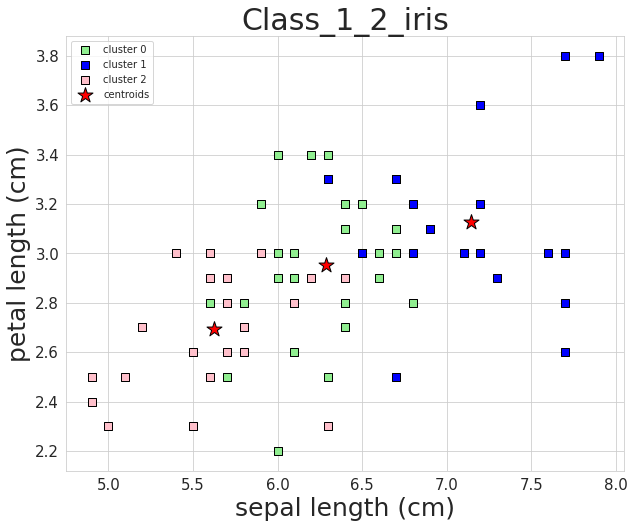

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.717
Macro precision (sklearn library): 0.583
Macro recall (sklearn library): 0.521
Macro f1-score (sklearn library) : 0.471
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.286
Macro precision (sklearn library): 0.143
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.222
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.462
Macro precision (sklearn library): 0.542
Macro recall (sklearn library): 0.544
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(class_1_2_iris,1,0,classifiers, 3, 'sepal length (cm)','petal length (cm)','Class_1_2_iris',True)

--------------------------------------------------------------------------------
DataSet: Class_2_3_iris
Number of clusters: 3
--------------------------------------------------------------------------------


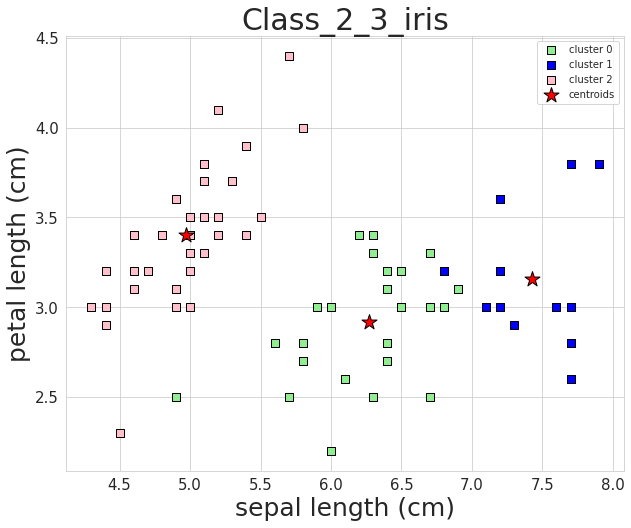

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.678
Macro precision (sklearn library): 0.397
Macro recall (sklearn library): 0.481
Macro f1-score (sklearn library) : 0.420
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.286
Macro precision (sklearn library): 0.143
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.222
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.483
Macro precision (sklearn library): 0.605
Macro recall (sklearn library): 0.599
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(class_2_3_iris,1,0,classifiers, 3, 'sepal length (cm)','petal length (cm)','Class_2_3_iris',True)

--------------------------------------------------------------------------------
DataSet: Class_1_3_iris
Number of clusters: 3
--------------------------------------------------------------------------------


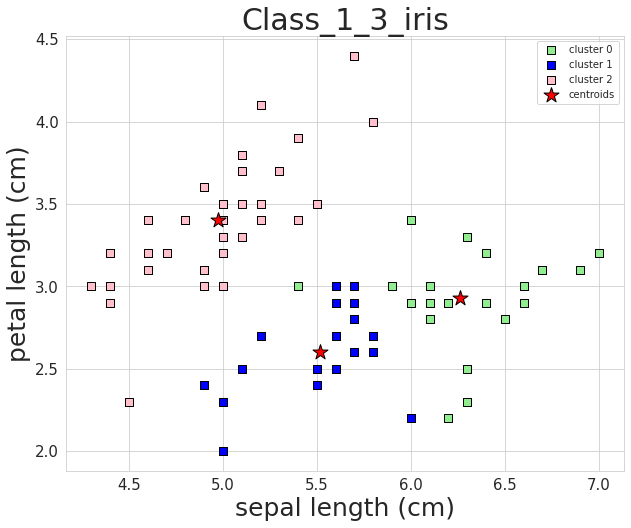

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.675
Macro precision (sklearn library): 0.379
Macro recall (sklearn library): 0.477
Macro f1-score (sklearn library) : 0.413
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.286
Macro precision (sklearn library): 0.143
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.222
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.285
Macro precision (sklearn library): 0.170
Macro recall (sklearn library): 0.497
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(class_1_3_iris,1,0,classifiers, 3, 'sepal length (cm)','petal length (cm)','Class_1_3_iris',True)

## New Thyroid Dataset results

--------------------------------------------------------------------------------
DataSet: Class_1_Thyroid
Number of clusters: 2
--------------------------------------------------------------------------------


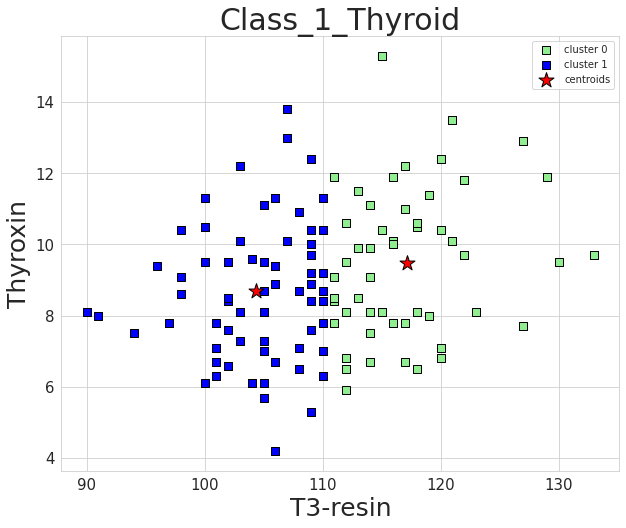

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.689
Macro precision (sklearn library): 0.599
Macro recall (sklearn library): 0.509
Macro f1-score (sklearn library) : 0.427
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.316
Macro precision (sklearn library): 0.158
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.240
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.607
Macro precision (sklearn library): 0.560
Macro recall (sklearn library): 0.553
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(class_1_thyroid,1,0,classifiers, 2, 'T3-resin','Thyroxin','Class_1_Thyroid',True)

--------------------------------------------------------------------------------
DataSet: Class_1_2_Thyroid
Number of clusters: 2
--------------------------------------------------------------------------------


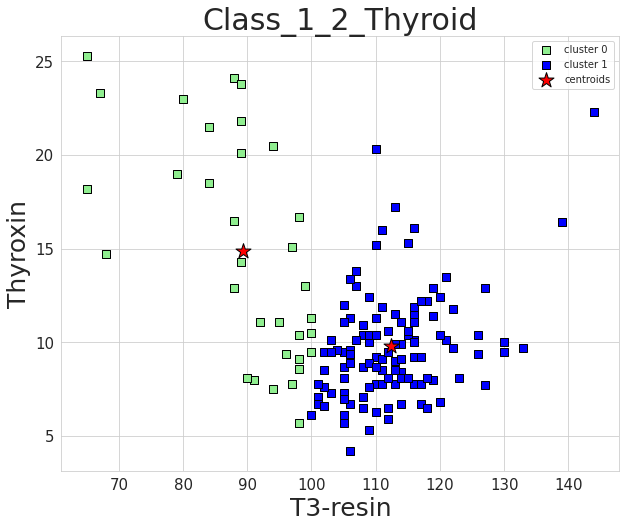

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.472
Macro precision (sklearn library): 0.557
Macro recall (sklearn library): 0.518
Macro f1-score (sklearn library) : 0.373
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.552
Macro precision (sklearn library): 0.276
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.356
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.546
Macro precision (sklearn library): 0.490
Macro recall (sklearn library): 0.499
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(class_1_2_thyroid,1,0,classifiers, 2, 'T3-resin','Thyroxin','Class_1_2_Thyroid',True)

--------------------------------------------------------------------------------
DataSet: Class_2_3_Thyroid
Number of clusters: 5
--------------------------------------------------------------------------------


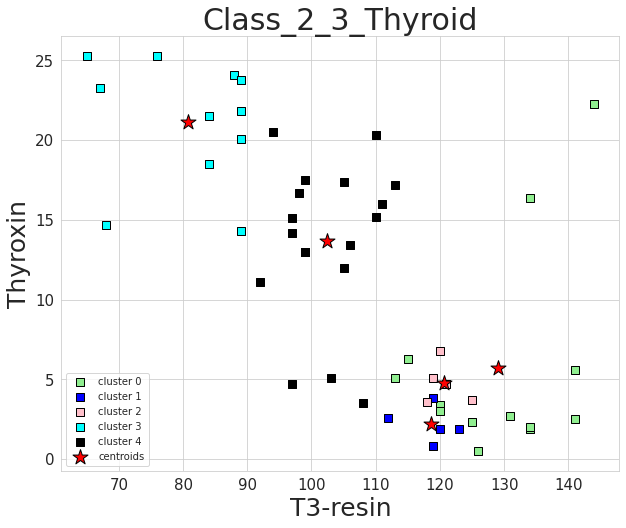

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.919
Macro precision (sklearn library): 0.463
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.480
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.080
Macro precision (sklearn library): 0.040
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.074
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.183
Macro precision (sklearn library): 0.424
Macro recall (sklearn library): 0.490
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(class_2_3_thyroid,1,0,classifiers, 5, 'T3-resin','Thyroxin','Class_2_3_Thyroid',True)

--------------------------------------------------------------------------------
DataSet: Class_1_3_Thyroid
Number of clusters: 2
--------------------------------------------------------------------------------


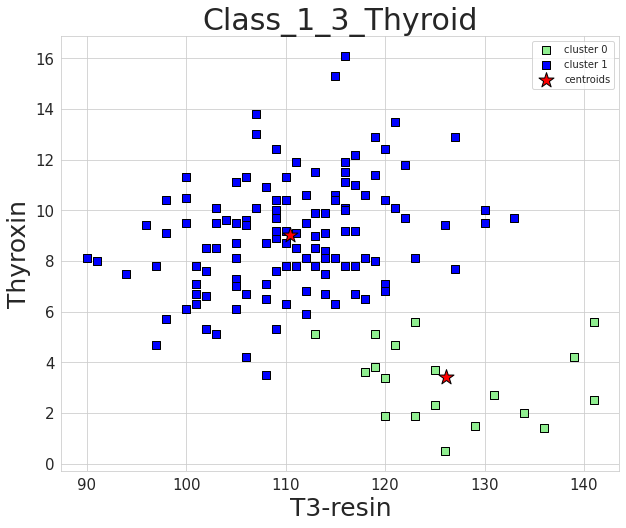

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.521
Macro precision (sklearn library): 0.663
Macro recall (sklearn library): 0.527
Macro f1-score (sklearn library) : 0.387
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.507
Macro precision (sklearn library): 0.254
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.336
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.498
Macro precision (sklearn library): 0.407
Macro recall (sklearn library): 0.492
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(class_1_3_thyroid,1,0,classifiers, 2, 'T3-resin','Thyroxin','Class_1_3_Thyroid',True)

## Wisconsin Breast Cancer Dataset results

--------------------------------------------------------------------------------
DataSet: Breast_cancer_Benign_positive
Number of clusters: 3
--------------------------------------------------------------------------------


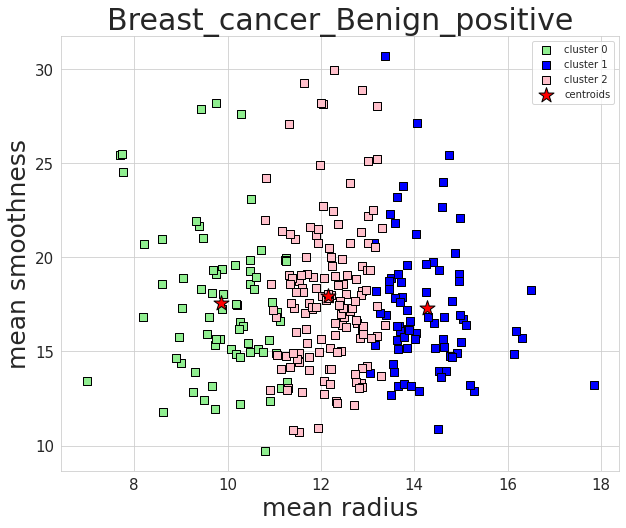

--------------------------------------------------------------------------------
Classifier: SVM
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.560
Macro precision (sklearn library): 0.433
Macro recall (sklearn library): 0.431
Macro f1-score (sklearn library) : 0.432
--------------------------------------------------------------------------------
Classifier: J48
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.258
Macro precision (sklearn library): 0.134
Macro recall (sklearn library): 0.500
Macro f1-score (sklearn library) : 0.207
--------------------------------------------------------------------------------
Classifier: RF
--------------------------------------------------------------------------------
Test accuracy(sklearn library): 0.285
Macro precision (sklearn library): 0.508
Macro recall (sklearn library): 0.507
Macro f1-score (sklearn library) :

In [ ]:
MultiKOC(cancer_df,1,0,classifiers, 3, 'mean radius','mean smoothness','Breast_cancer_Benign_positive',True)